## INSTITUTO FEDERAL DE MINAS GERAIS

## APRENDIZADO DE MÁQUINA 

Especialização em Inteligência Artificial

ALUNO: ARTHUR CARDOSO FIGUEIREDO  
PROFESSOR: D.Sc FREDERICO GADELHA GUIMARÃES

Análise de Modelos de Aprendizagem de Máquina:  
-KNN

-NAVYE BAYES 

-ÁRVORE DE DECISÃO:DECISION TREE

DATA SET ANALISADO: 

TITANIC  (TRAIN)

KAGGLE https://www.kaggle.com/datasets/heptapod/titanic

In [191]:
pip install pandas

In [192]:
import pandas as pd


In [193]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [194]:

train = pd.read_csv('C:/train.csv', index_col = 'PassengerId')

In [195]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [196]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [197]:
print(train.shape)
print('-'*40)
print(train.info())
print('-'*50)
print(train.describe())
print('-'*50)
print(train.describe(include=['O']))
print('-'*50)
print(train.head(5))

(891, 11)
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
--------------------------------------------------
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594  

Deteção e imputação de valores em falta

In [198]:
(train.isnull().sum().sort_values(ascending=False)*100)/train.shape[0]

Cabin       77.104377
Age         19.865320
Embarked     0.224467
Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
dtype: float64

Algumas variáveis do conjunto de dados possuem valores ausentes significativos. A variável "Cabin" possui 77,10% de valores ausentes e será descartada por ser inútil para nossa análise. A variável "Age" tem 19,87% de valores ausentes e será imputada usando a média das idades. A variável "Embarked" tem menos de 1% de valores ausentes e também será imputada utilizando valores mais frequentes. Essas abordagens nos permitirão lidar com os dados ausentes e continuar com a análise dos dados disponíveis.

Excluindo colunas, que não vamos utilizar:

In [199]:
train.drop(['Cabin','Ticket','Name'], axis=1 ,inplace=True)

Imputação de valores em falta para a variável Idade com a média


In [200]:
train.Age

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [201]:
train.Age = train.Age.fillna(train.Age.median())

Imputação de valores faltantes para a variável embarcados com os mais frequentes

In [202]:
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]))

Transformando as variáveis qualitativas em quantitativas

In [203]:
train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train['Embarked'] = train['Embarked'].map( {'Q': 0, 'C': 1,'S':2} ).astype(int)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,1
3,1,3,1,26.0,0,0,7.9250,2
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,2


## Dividindo nossos dados

In [204]:
X = train.drop('Survived',axis=1)
y = train['Survived']

Análises ML


In [205]:
from sklearn.model_selection import cross_val_score


KNN

In [206]:
knn = KNeighborsClassifier()
scores_knn = cross_val_score(knn, X, y, cv = 8)
print(scores_knn.mean(), scores_knn.std())

0.6914716055341056 0.04264352519600956


NAVYE BAYES

In [207]:
nb = GaussianNB()
scores_nb = cross_val_score(nb, X, y, cv = 8)
print(scores_nb.mean(), scores_nb.std())

0.7856640122265122 0.017795028027115446


DECISION TREE

In [208]:
tr = DecisionTreeClassifier()
scores_tr = cross_val_score(tr, X, y, cv = 6)
print(scores_tr.mean(), scores_tr.std())

0.7789316161799382 0.0328303513279584


In [209]:
import matplotlib.pyplot as plt


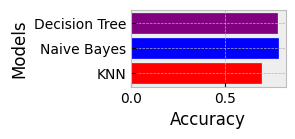

In [210]:
names = ['KNN', 'Naive Bayes', 'Decision Tree']
acc = [scores_knn.mean(), scores_nb.mean(), scores_tr.mean()]

plt.figure(figsize=(2, 1))
graph = plt.barh(names, acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('red')
graph[1].set_color('blue')
graph[2].set_color('purple')


plt.show()


K-Nearest Neighbors (KNN):

Acurácia média: 0.69
Variabilidade dos resultados: 0.04

Naive Bayes (NB):

Acurácia média: 0.79
Variabilidade dos resultados: 0.02

Decision Tree (TR):

Acurácia média: 0.77
Variabilidade dos resultados: 0.04
Com base nesses resultados, o Naive Bayes apresentou a maior acurácia média (0.79), seguido pela Decision Tree (0.77) e o KNN com a menor acurácia média (0.69). O Naive Bayes também demonstrou menor variabilidade nos resultados, indicando maior consistência em comparação com os outros dois classificadores.

Foi decidido ultizar, outro modelo de aprendizagem de máquina, o Random Forest.

RANDOM FOREST

In [211]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier

In [212]:

rand = RandomForestClassifier(n_estimators=300, max_depth=10)
scores_rand = cross_val_score(rand, X, y, cv = 6)
print(scores_rand.mean(), scores_rand.std())

0.8372558800411148 0.03324350673405568


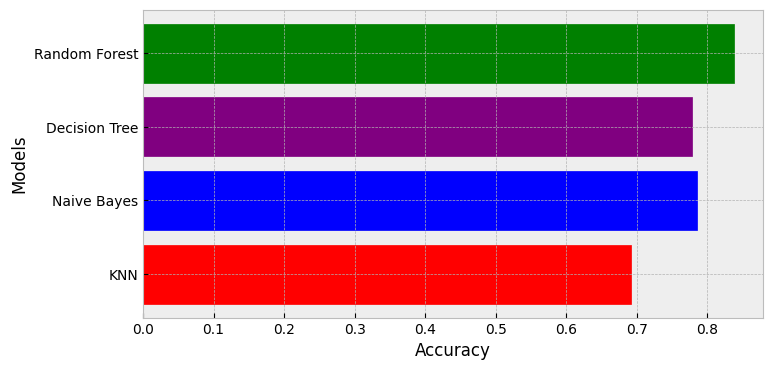

In [213]:
import matplotlib.pyplot as plt

names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']
acc = [scores_knn.mean(), scores_nb.mean(), scores_tr.mean(), scores_rand.mean()]

plt.figure(figsize=(8, 4))
graph = plt.barh(names, acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')

colors = ['red', 'blue', 'purple', 'green']  # Adicionando a cor para o Random Forest
for i in range(len(graph)):
    graph[i].set_color(colors[i])

plt.show()


RELACIONANDO COM OS MODELOS ANTERIORES, PODEMOS DEFINIR:

Random Forest:
Acurácia média: 0.835
Variabilidade dos resultados: 0.034

Decision Tree (TR):
Acurácia média: 0.77
Variabilidade dos resultados: 0.04

Naive Bayes (NB):
Acurácia média: 0.79
Variabilidade dos resultados: 0.02

K-Nearest Neighbors (KNN):
Acurácia média: 0.69
Variabilidade dos resultados: 0.04

Comparando os modelos, o Random Forest obteve a maior acurácia média (0.835), seguido pela Decision Tree (0.77), Naive Bayes (0.79) e K-Nearest Neighbors (0.69). O Naive Bayes teve a menor variabilidade (0.02), enquanto a Decision Tree e o K-Nearest Neighbors apresentaram variabilidades iguais (0.04). Portanto, a ordem de desempenho, do melhor para o pior, é: Random Forest, Decision Tree, Naive Bayes e K-Nearest Neighbors.

DATA SET ANALISADO: 

diabetes prediction using Machine Learning
KAGGLE - MACHINE LEARNING https://www.kaggle.com/datasets/mathchi/diabetes-data-set/code

In [214]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score , precision_score , recall_score , f1_score

In [215]:
diabetes = pd.read_csv('C:\diabetes.csv')

In [216]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [217]:
diabetes.shape

(768, 9)

In [218]:
diabetes.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0              6      148             72             35        0  33.6  \
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [219]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [220]:
diabetes = diabetes.rename(columns={'DiabetesPedigreeFunction':'DiabetesPedigree' })


In [221]:
diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   Glucose           768 non-null    int64  
 2   BloodPressure     768 non-null    int64  
 3   SkinThickness     768 non-null    int64  
 4   Insulin           768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [222]:
diabetes.duplicated().any()

False

In [223]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [224]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

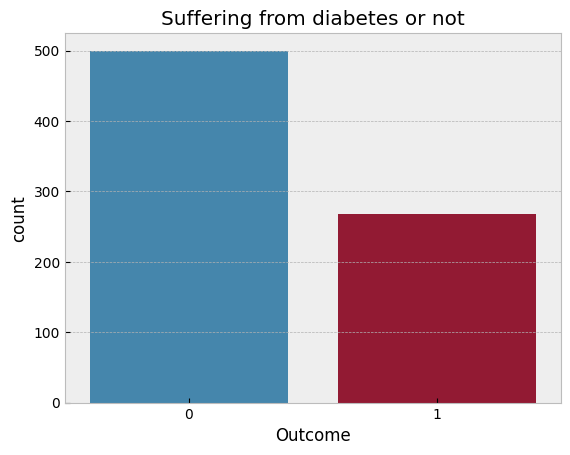

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('bmh')

ax = sns.countplot(x='Outcome', data=diabetes)
ax.set_title('Suffering from diabetes or not')

plt.show()


In [226]:
np.sort(diabetes.Age.unique())

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72,
       81], dtype=int64)

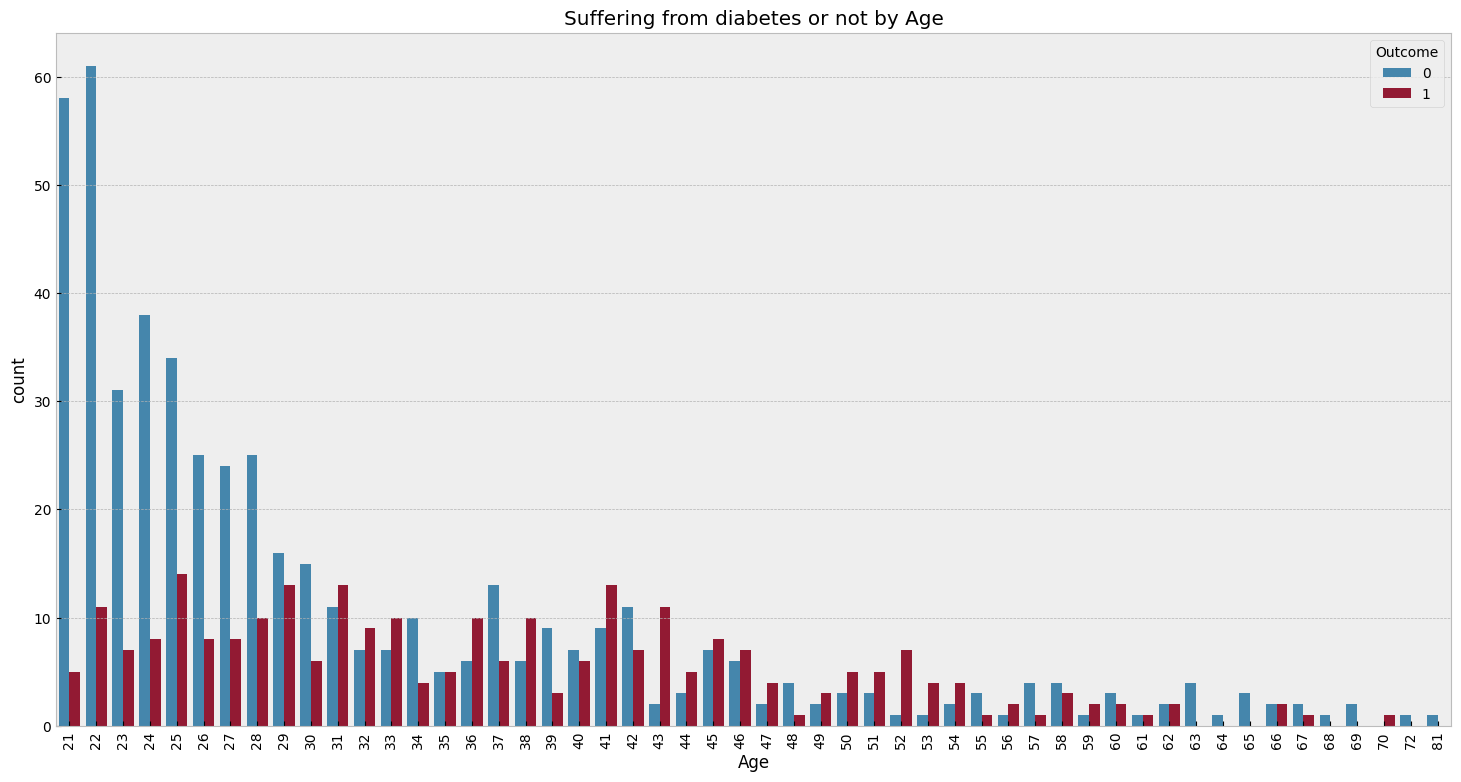

In [227]:
plt.figure(figsize=(18,9))
plt.xticks(rotation = 90)
ax = sns.countplot(x= diabetes.Age , hue= diabetes.Outcome)
ax.set_title('Suffering from diabetes or not by Age')
plt.show()


In [228]:
pregnancies_unique = np.sort(diabetes.Pregnancies.unique())
print(pregnancies_unique)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]


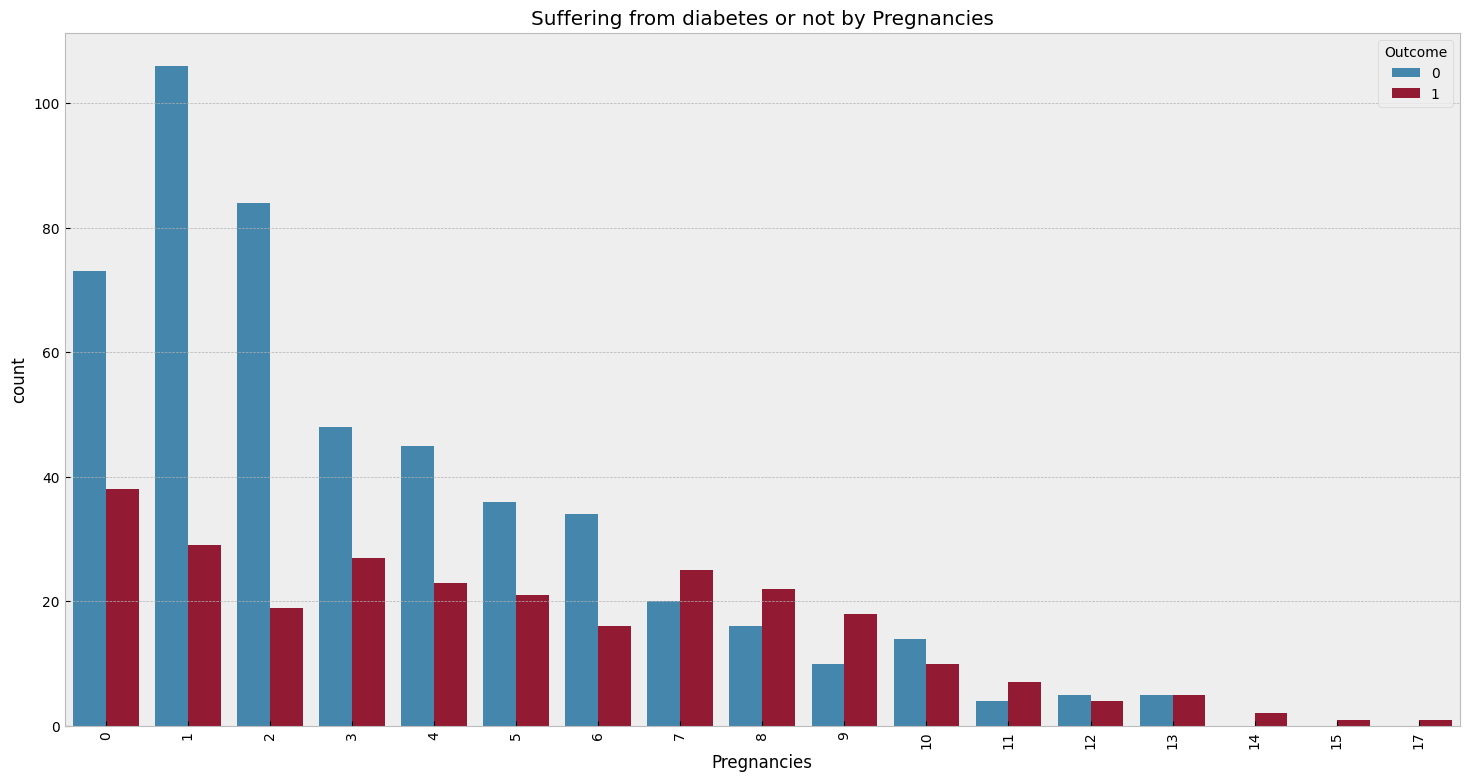

In [229]:
plt.figure(figsize=(18,9))
plt.xticks(rotation = 90)
ax = sns.countplot(x= diabetes.Pregnancies , hue= diabetes.Outcome)
ax.set_title('Suffering from diabetes or not by Pregnancies')
plt.show()

In [230]:
np.sort(diabetes.Glucose.unique())

array([  0,  44,  56,  57,  61,  62,  65,  67,  68,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190, 191, 193,
       194, 195, 196, 197, 198, 199], dtype=int64)

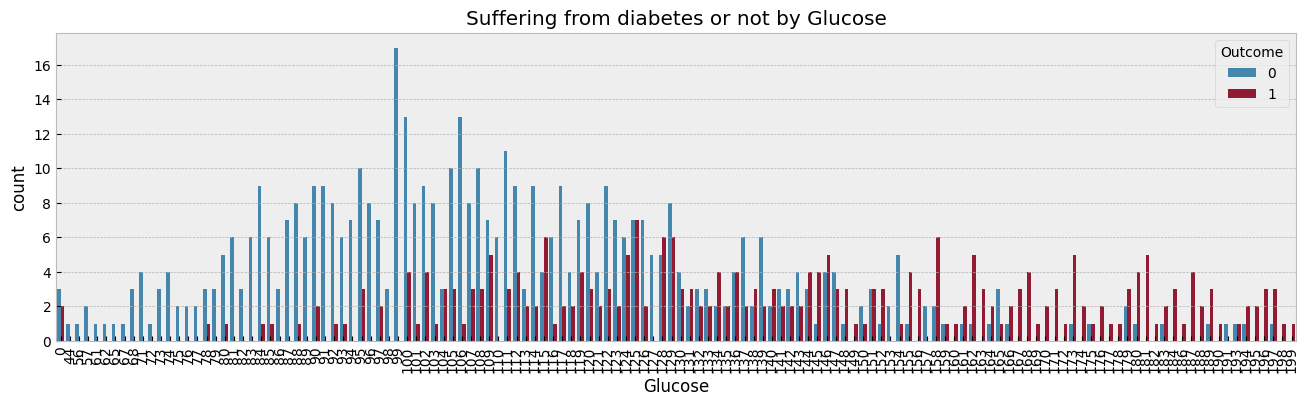

In [239]:
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
ax = sns.countplot(x= diabetes.Glucose , hue= diabetes.Outcome)
ax.set_title('Suffering from diabetes or not by Glucose')
plt.show()

In [231]:
np.sort(diabetes.BloodPressure.unique())

array([  0,  24,  30,  38,  40,  44,  46,  48,  50,  52,  54,  55,  56,
        58,  60,  61,  62,  64,  65,  66,  68,  70,  72,  74,  75,  76,
        78,  80,  82,  84,  85,  86,  88,  90,  92,  94,  95,  96,  98,
       100, 102, 104, 106, 108, 110, 114, 122], dtype=int64)

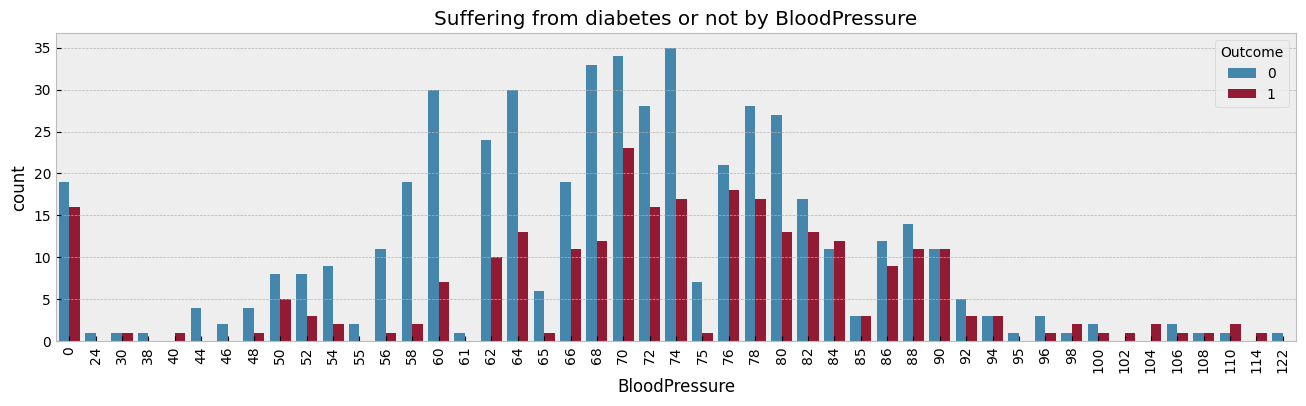

In [232]:
plt.figure(figsize=(16,4))
plt.xticks(rotation = 90)
ax = sns.countplot(x= diabetes.BloodPressure , hue= diabetes.Outcome)
ax.set_title('Suffering from diabetes or not by BloodPressure')
plt.show()

In [233]:
np.sort(diabetes.Insulin.unique())


array([  0,  14,  15,  16,  18,  22,  23,  25,  29,  32,  36,  37,  38,
        40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
        68,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,
        99, 100, 105, 106, 108, 110, 112, 114, 115, 116, 119, 120, 122,
       125, 126, 127, 128, 129, 130, 132, 135, 140, 142, 144, 145, 146,
       148, 150, 152, 155, 156, 158, 159, 160, 165, 166, 167, 168, 170,
       171, 175, 176, 178, 180, 182, 183, 184, 185, 188, 190, 191, 192,
       193, 194, 196, 200, 204, 205, 207, 210, 215, 220, 225, 228, 230,
       231, 235, 237, 240, 245, 249, 250, 255, 258, 265, 270, 271, 272,
       274, 275, 277, 278, 280, 284, 285, 291, 293, 300, 304, 310, 318,
       321, 325, 326, 328, 330, 335, 342, 360, 370, 375, 387, 392, 402,
       415, 440, 465, 474, 478, 480, 485, 495, 510, 540, 543, 54

In [236]:
import pandas as pd

In [242]:
pip install Jinja2


                                              0.0/133.1 kB ? eta -:--:--
     ---------------------------             92.2/133.1 kB 5.5 MB/s eta 0:00:01
     -------------------------------------- 133.1/133.1 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [243]:
import pandas as pd

corr_matrix = diabetes.corr()
corr_styled = corr_matrix.style.background_gradient(cmap="Blues")

corr_styled


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


SVM model

In [244]:
X= diabetes.drop(['Outcome'] , axis=1)
y= diabetes['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

accuracy_train:  77.85 %
accuracy_test:  72.73 %
precision_score:  0.63
recall_score:  0.46
f1_score:  0.53


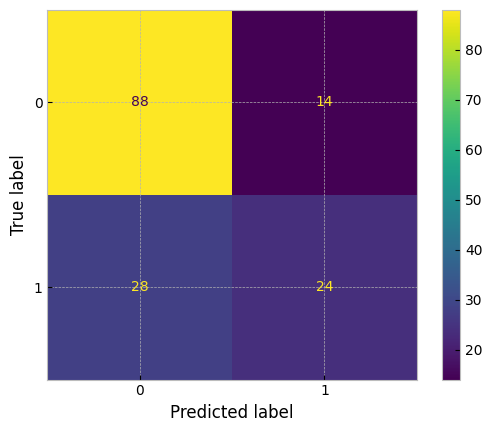

In [245]:
clf = svm.SVC().fit(X_train, y_train)
acc_train = clf.score(X_train, y_train)
y_pred = clf.predict(X_test)
acc_test = accuracy_score(y_pred , y_test)
print('accuracy_train: ',round(acc_train*100,2),'%')
print('accuracy_test: ', round(acc_test*100,2),'%')
print('precision_score: ', round(precision_score(y_test, y_pred),2))
print('recall_score: ', round(recall_score(y_test, y_pred),2))
print('f1_score: ', round(f1_score(y_test, y_pred),2))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

KNN Model

KNN
Accuracy (Train): 79.8 %
Accuracy (Test): 67.53 %
Precision: 0.52
Recall: 0.54
F1 Score: 0.53
Confusion Matrix:
[[76 26]
 [24 28]]


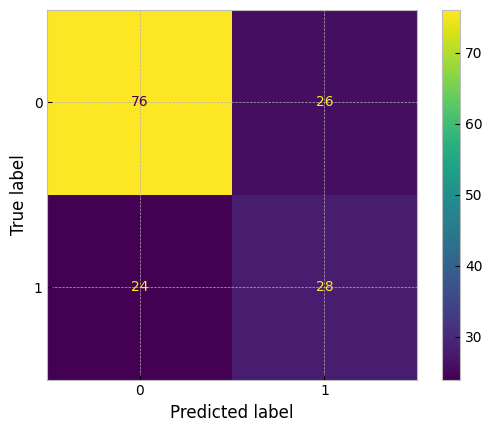

In [250]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
acc_train = knn.score(X_train, y_train)
y_pred = knn.predict(X_test)
acc_test = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('KNN')
print('Accuracy (Train):', round(acc_train * 100, 2), '%')
print('Accuracy (Test):', round(acc_test * 100, 2), '%')
print('Precision:', round(precision, 2))
print('Recall:', round(recall, 2))
print('F1 Score:', round(f1, 2))
print('Confusion Matrix:')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Naive Bayes Model

Naive Bayes
Accuracy (Train): 75.9 %
Accuracy (Test): 70.78 %
Precision: 0.55
Recall: 0.71
F1 Score: 0.62
Confusion Matrix:
[[72 30]
 [15 37]]


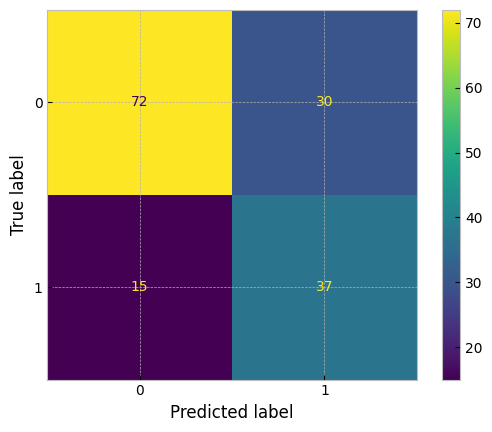

In [251]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
acc_train = nb.score(X_train, y_train)
y_pred = nb.predict(X_test)
acc_test = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Naive Bayes')
print('Accuracy (Train):', round(acc_train * 100, 2), '%')
print('Accuracy (Test):', round(acc_test * 100, 2), '%')
print('Precision:', round(precision, 2))
print('Recall:', round(recall, 2))
print('F1 Score:', round(f1, 2))
print('Confusion Matrix:')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Decision Tree Classifier

Decision Tree
Accuracy (Train): 100.0 %
Accuracy (Test): 68.18 %
Precision: 0.52
Recall: 0.62
F1 Score: 0.57
Confusion Matrix:
[[73 29]
 [20 32]]


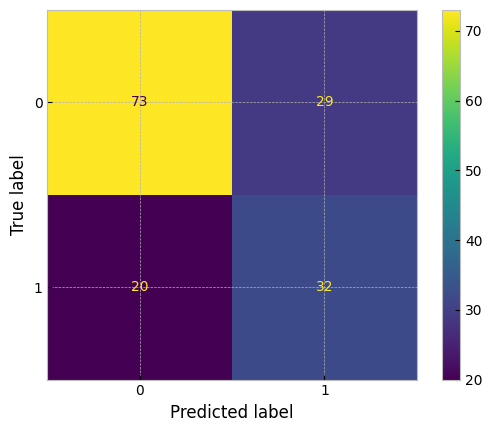

In [253]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
acc_train = dt.score(X_train, y_train)
y_pred = dt.predict(X_test)
acc_test = accuracy_score(y_pred, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Decision Tree')
print('Accuracy (Train):', round(acc_train * 100, 2), '%')
print('Accuracy (Test):', round(acc_test * 100, 2), '%')
print('Precision:', round(precision, 2))
print('Recall:', round(recall, 2))
print('F1 Score:', round(f1, 2))
print('Confusion Matrix:')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Conclusão :


Após realizar uma análise comparativa entre os modelos SVM, KNN, Naive Bayes e Decision Tree, chegamos às seguintes conclusões:

O modelo de Naive Bayes apresentou o melhor desempenho geral, com uma boa acurácia nos dados de teste (70.78%), alta capacidade de identificar corretamente os casos positivos (recall de 0.71) e um equilíbrio entre precisão (0.55) e F1 Score (0.62).

O SVM obteve uma acurácia próxima à do Naive Bayes nos dados de teste (72.73%), mas apresentou um recall um pouco mais baixo (0.46) e uma precisão ligeiramente superior (0.63). Seus resultados indicam um desempenho satisfatório, embora um pouco inferior ao Naive Bayes.

O KNN mostrou uma acurácia inferior aos dois primeiros modelos nos dados de teste (67.53%), com uma precisão (0.52), recall (0.54) e F1 Score (0.53) próximos. Apesar disso, ainda apresentou um desempenho razoável.

A Decision Tree apresentou um desempenho inferior aos outros modelos, com uma acurácia nos dados de teste de 68.18%. Além disso, sua acurácia perfeita nos dados de treinamento indica um possível problema de overfitting. Suas métricas de precisão, recall e F1 Score ficaram no mesmo patamar dos demais modelos.

Em resumo, o Naive Bayes mostrou-se como o modelo mais eficiente, seguido pelo SVM e KNN, enquanto a Decision Tree apresentou desempenho inferior devido ao overfitting. No entanto, é importante considerar outros fatores e métricas específicas do problema ao escolher o modelo mais adequado.